### Titanic Data Analyses 
### Made a prediciton model based on Decision Tree to predict weather a passenger, aboard the titanic, survived given their age. 

In [68]:
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

In [69]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


### Exploratory Data Analysis

In [70]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
train_df.shape


(891, 12)

In [72]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Check total number of null values 

In [73]:
#check for null values in the data 
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [112]:
count_survived = train_df['Survived'].value_counts()
count_survived

1    123
0     60
Name: Survived, dtype: int64

<AxesSubplot:>

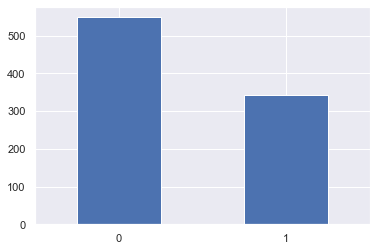

In [75]:
#plot a bar plot to get a visual representation of survival numbers
count_survived.plot.bar(rot=0)


In [111]:
#Get total number of passengers in each class 
count_class = train_df['Pclass'].value_counts(sort=False)
count_class

1    158
2     15
3     10
Name: Pclass, dtype: int64

<AxesSubplot:>

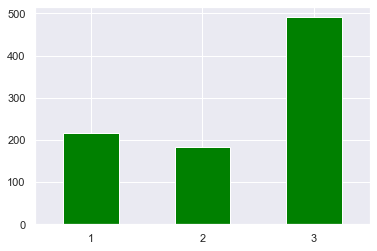

In [77]:
#visualize the total number of passengers in each class
count_class.plot.bar(rot=0, color = 'green')


In [110]:
count_gender = train_df['Sex'].value_counts()
count_gender

male      95
female    88
Name: Sex, dtype: int64

<AxesSubplot:>

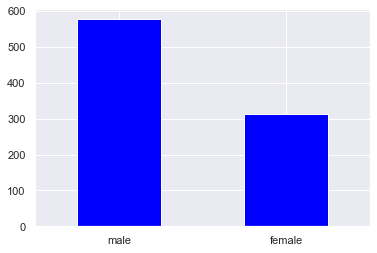

In [79]:
count_gender.plot.bar(rot =0, color = 'blue')

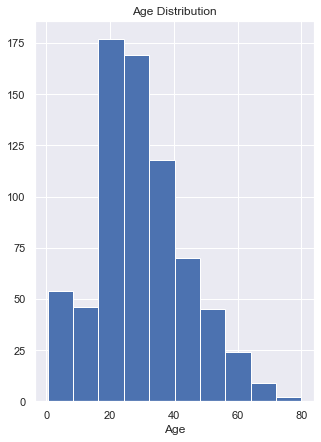

In [80]:
#visualize age distribution
#Since age is numerical, we will plot a histogram column

plt.figure(figsize=(5,7))
plt.hist(train_df['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

In [81]:
#build model weather passenger will survive depending on their age
#target/dependent variable = survived 
#indepenent variable = age

#check for missing values first in your data 
#check for missing values in Survived column 
train_df.Survived.isnull().sum()

#can also be written as 
#sum(train_df.Survived.isnull())


0

In [82]:
#check for missing value in age column 
train_df.Age.isnull().sum()

177

In [83]:
#can also check all columns together
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [86]:
#remove null values from age
train_df = train_df.dropna()

#check if all null values are removed
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### Build Model 

In [96]:
x_train = train_df[['Age']]
y_train = train_df[['Survived']]

In [97]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
dtc = DecisionTreeClassifier()

In [99]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [107]:
#predicting values

In [108]:
#drop null values from test set
test_df = test_df.dropna()
#check if you got the right output
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [104]:

x_test = test_df[['Age']]


In [105]:
y_pred = dtc.predict(x_test)

In [113]:

#prediction for survival of passengers aboard the titanic, given their age. 
y_pred

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1])